# Flights in the United States
## by Eden Radovich

## Analysis Overview

> This analysis details relationships with flight delays and different factors that contribute to those delays.

## Dataset Overview

> The dataset contains over 21 million flights in the United States from the years 2006 to 2008 with information about arrival and departure times, airlines, cities, etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
flights = pd.read_csv('flights_clean.csv')

## Distribution of Departure Delays

> To see the distribution of delayed flights, I selected only the flights that had delays greater than 15 minutes. I am making the assumption that delays less than 15 minutes are not significant.

>The distribution below shows us that the data is, unsurprisingly, highly skewed to the right, as flights can only be delayed so much, and the goal is to have small or no delays.

In [4]:
delayed = flights.query('DepDelay > 15 and ArrDelay > 15')

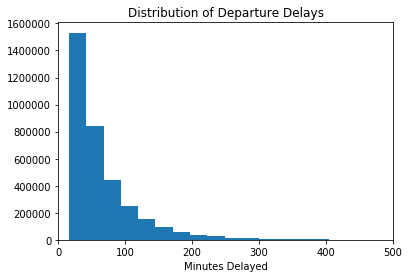

In [10]:
plt.hist(data=delayed,x='DepDelay',bins=100);
plt.xlim(0,500)
plt.title('Distribution of Departure Delays')
plt.xlabel('Minutes Delayed');

## Distribution of Delays by Flight Path

> I've taken the top ten most frequent flight paths by number of flights to see how they compare when it comes to delays.

> Of the Top 10 Most Common Flight Paths, LAS > LAX, PHX > LAS, and PHX > LAX have the highest median departure delay. These three flights paths also have the largest variability in delays, making them less consistent and more unpreditable. 

In [11]:
top_10_flights = list(flights['FlightPath'].value_counts().head(10).to_dict().keys())

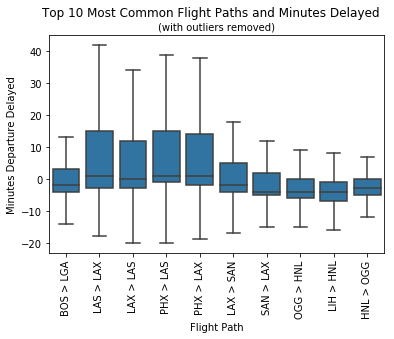

NOTE: Negative minutes means early departure
 
BOS: Boston
LGA: LaGuardia
LAS: Las Vegas
LAX: Los Angeles
PHX: Phoenix
SAN: San Diego
OGG: Kahului (Maui)
HNL: Honolulu
LIH: Lihue (Kauai)


In [20]:
base_color = sb.color_palette()[0]
sb.boxplot(data = flights[flights['FlightPath'].isin(top_10_flights)], x = 'FlightPath', y = 'DepDelay', 
           color=base_color,showfliers=False)
plt.xlabel('Flight Path')
plt.ylabel('Minutes Departure Delayed')
plt.title('(with outliers removed)',fontsize=10)
plt.suptitle('Top 10 Most Common Flight Paths and Minutes Delayed')
plt.xticks(rotation=90)
plt.show();
print ('NOTE: Negative minutes means early departure')
print (" ")
print ('BOS: Boston')
print ('LGA: LaGuardia')
print ('LAS: Las Vegas')
print ('LAX: Los Angeles')
print ('PHX: Phoenix')
print ('SAN: San Diego')
print ('OGG: Kahului (Maui)')
print ('HNL: Honolulu')
print ('LIH: Lihue (Kauai)')

## Distribution of Delays by Month

> While it appears that flight delays across months have a median departure delay around 0 minutes, the months that experience the most variability in delays appear to be June and December. This might suggest delays due to seasonality affects (Summer and Winter Holidays).

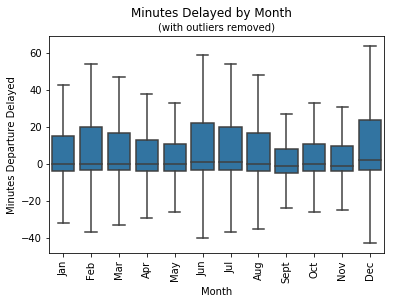

In [15]:
base_color = sb.color_palette()[0]
tick_labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
g = sb.boxplot(data = flights, x = 'Month', y = 'DepDelay', 
           color=base_color, showfliers=False)
plt.xlabel('Month')
plt.ylabel('Minutes Departure Delayed')
plt.title('(with outliers removed)',fontsize=10)
plt.suptitle('Minutes Delayed by Month')
plt.xticks(rotation=90,label = tick_labels)
g.set(xticklabels=tick_labels);

## Distribution of Delays by Day of Week

> Similarly, the median departure delay by Day of Week hovers around 0 minutes delayed. The most variability occurs on Friday. In addition to potential seasonality, this graph suggests there could be a weekend travel affect on delays as well.

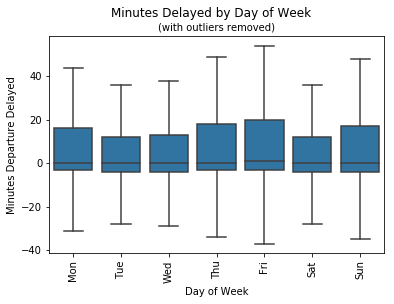

In [21]:
base_color = sb.color_palette()[0]
tick_labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
g = sb.boxplot(data = flights, x = 'DayOfWeek', y = 'DepDelay', 
           color=base_color, showfliers=False)
plt.xlabel('Day of Week')
plt.ylabel('Minutes Departure Delayed')
plt.title('(with outliers removed)',fontsize=10)
plt.suptitle('Minutes Delayed by Day of Week')
plt.xticks(rotation=90,label = tick_labels)
g.set(xticklabels=tick_labels);

## Delays by Flight Path and Month

> Combining the Flight Path and Month data into one multivariate plot, we see that within each flight path, the highest delays occur in December, (except for BOS > LGA and LIH > HNL where May/June experience most delays). 

> We are seeing a trend in Seasonality (Summer and Winter) affecting delays. I suspect this is due to airlines not increasing the frequency of flights, even though people are traveling more, potentially causing delays to due overcrowding.

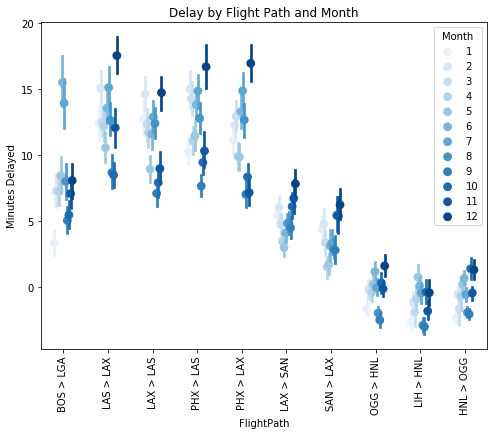

BOS: Boston
LGA: LaGuardia
LAS: Las Vegas
LAX: Los Angeles
PHX: Phoenix
SAN: San Diego
OGG: Kahului (Maui)
HNL: Honolulu
LIH: Lihue (Kauai)


In [50]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = flights[flights['FlightPath'].isin(top_10_flights)], x = 'FlightPath', y = 'DepDelay', hue = 'Month',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Delay by Flight Path and Month')
plt.ylabel('Minutes Delayed')
plt.xticks(rotation=90)
plt.show()
print ('BOS: Boston')
print ('LGA: LaGuardia')
print ('LAS: Las Vegas')
print ('LAX: Los Angeles')
print ('PHX: Phoenix')
print ('SAN: San Diego')
print ('OGG: Kahului (Maui)')
print ('HNL: Honolulu')
print ('LIH: Lihue (Kauai)');

## Delays by Flight Path and Day of Week

>The general trend here shows that more delays occur as they approach the weekend, i.e. when more people are likely traveling. Friday (5) appears to be the highest day for delays. 

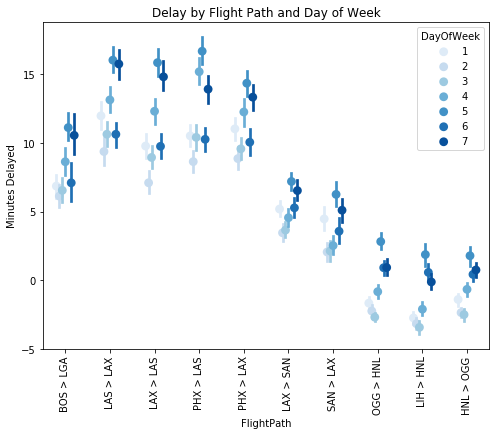

NOTE: 1 = Monday, 7 = Sunday
BOS: Boston
LGA: LaGuardia
LAS: Las Vegas
LAX: Los Angeles
PHX: Phoenix
SAN: San Diego
OGG: Kahului (Maui)
HNL: Honolulu
LIH: Lihue (Kauai)


In [51]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = flights[flights['FlightPath'].isin(top_10_flights)], x = 'FlightPath', y = 'DepDelay', hue = 'DayOfWeek',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Delay by Flight Path and Day of Week')
plt.ylabel('Minutes Delayed')
plt.xticks(rotation=90)
plt.show()
print ('NOTE: 1 = Monday, 7 = Sunday')
print ('BOS: Boston')
print ('LGA: LaGuardia')
print ('LAS: Las Vegas')
print ('LAX: Los Angeles')
print ('PHX: Phoenix')
print ('SAN: San Diego')
print ('OGG: Kahului (Maui)')
print ('HNL: Honolulu')
print ('LIH: Lihue (Kauai)');